# Face Mask Detection Model - MobileNet

### Import necessary Libraries

In [1]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

### Define Dataset directory and path for data

In [2]:
data_dir = "C:\\Users\\MUBASHIR MOHSIN\\OneDrive - American International University-Bangladesh\\MAJOR\\Computer Vision\\Course\\Finalterm\\Assignments\\Face_Mask_Detection\\content\\Face_Mask_Dataset\\"
train_dir = os.path.join(data_dir, "Train")
test_dir = os.path.join(data_dir, "Test")
val_dir = os.path.join(data_dir, "Validation")

mask_dir = os.path.join(train_dir, "WithMask")
no_mask_dir = os.path.join(train_dir, "WithoutMask")

In [3]:
# To show Directories and Files in Dataset Path

for dirpath, dirnames, filenames in os.walk(data_dir):
    print(f"There are '{len(dirnames)}' directories and '{len(filenames)}' images in --> \n{dirpath}.\n")

There are '3' directories and '0' images in --> 
C:\Users\MUBASHIR MOHSIN\OneDrive - American International University-Bangladesh\MAJOR\Computer Vision\Course\Finalterm\Assignments\Face_Mask_Detection\content\Face_Mask_Dataset\.

There are '2' directories and '0' images in --> 
C:\Users\MUBASHIR MOHSIN\OneDrive - American International University-Bangladesh\MAJOR\Computer Vision\Course\Finalterm\Assignments\Face_Mask_Detection\content\Face_Mask_Dataset\Test.

There are '0' directories and '483' images in --> 
C:\Users\MUBASHIR MOHSIN\OneDrive - American International University-Bangladesh\MAJOR\Computer Vision\Course\Finalterm\Assignments\Face_Mask_Detection\content\Face_Mask_Dataset\Test\WithMask.

There are '0' directories and '509' images in --> 
C:\Users\MUBASHIR MOHSIN\OneDrive - American International University-Bangladesh\MAJOR\Computer Vision\Course\Finalterm\Assignments\Face_Mask_Detection\content\Face_Mask_Dataset\Test\WithoutMask.

There are '2' directories and '0' images in

### View Images from the Dataset

In [4]:
def view_images(target_dir, target_class, num_images=15, rows=3, cols=5):
    target_folder = os.path.join(target_dir, target_class)
    random_images = random.sample(os.listdir(target_folder), num_images)

    plt.figure(figsize=(7, 5))

    for i, image_name in enumerate(random_images, start=1):
        img_path = os.path.join(target_folder, image_name)
        img = mpimg.imread(img_path)

        plt.subplot(rows, cols, i)
        plt.imshow(img)
        plt.title(target_class)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

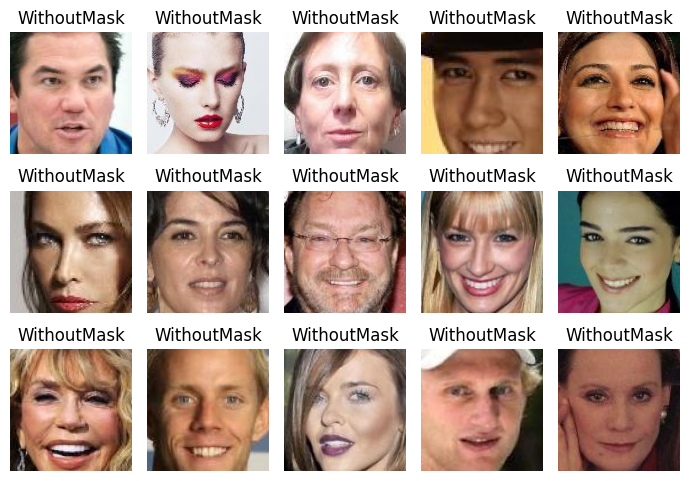

In [5]:
# Show Images Without Mask
view_images(train_dir, "WithoutMask", num_images=15, rows=3, cols=5)

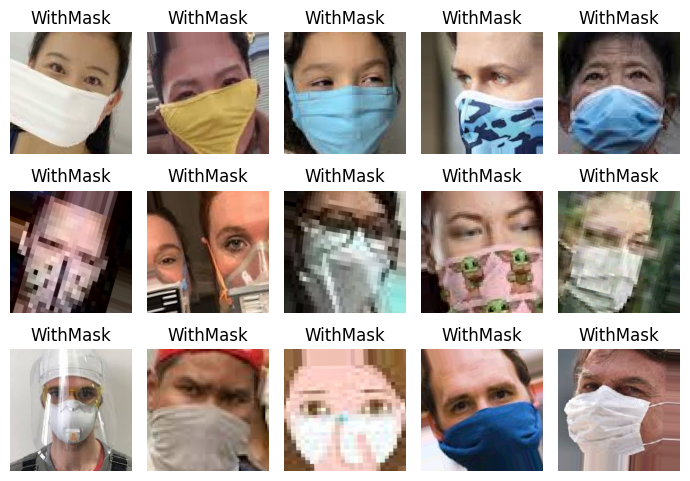

In [6]:
# Show Images With Mask
view_images(train_dir, "WithMask", num_images=15, rows=3, cols=5)

## Labeling Image Data for Model Building

#### Train Data

In [7]:
import os
import cv2
import random
import numpy as np

train_data = []
train_labels = []

with_mask_dir = os.path.join(train_dir, "WithMask")
without_mask_dir = os.path.join(train_dir, "WithoutMask")

# Load images with masks
for a in os.listdir(with_mask_dir):
    image = cv2.imread(os.path.join(with_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    train_data.append(image)
    train_labels.append(1)  # WithMask class is assigned label 1

# Load images without masks
for a in os.listdir(without_mask_dir):
    image = cv2.imread(os.path.join(without_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    train_data.append(image)
    train_labels.append(0)  # WithoutMask class is assigned label 0

Data Reduction for Convenience

In [8]:
# Randomly select indices to reduce data
random_indices = random.sample(range(len(train_data)), 5000)
train_data = [train_data[i] for i in random_indices]
train_labels = [train_labels[i] for i in random_indices]  # Update labels accordingly

# Convert to numpy arrays and normalize data
train_data = np.array(train_data) / 255.0
train_labels = np.array(train_labels)

In [9]:
print(f"Train Data Shape\t: {train_data.shape}")
print(f"Train Label Shape\t: {train_labels.shape}")

Train Data Shape	: (5000, 224, 224, 3)
Train Label Shape	: (5000,)


#### Test Data

In [10]:
test_data = []
test_labels = []

with_mask_dir = os.path.join(test_dir, "WithMask")
without_mask_dir = os.path.join(test_dir, "WithoutMask")

# Load images with masks
for a in os.listdir(with_mask_dir):
    image = cv2.imread(os.path.join(with_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    test_data.append(image)
    test_labels.append(1)  # WithMask class is assigned label 1

# Load images without masks
for a in os.listdir(without_mask_dir):
    image = cv2.imread(os.path.join(without_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    test_data.append(image)
    test_labels.append(0)  # WithoutMask class is assigned label 0

In [11]:
# Convert to numpy arrays and normalize data
test_data = np.array(test_data) / 255.0
test_labels = np.array(test_labels)

In [12]:
print(f"Test Data Shape \t: {test_data.shape}")
print(f"Test Label Shape \t: {test_labels.shape}")

Test Data Shape 	: (992, 224, 224, 3)
Test Label Shape 	: (992,)


## Model Building

#### Validation Data

In [13]:
val_data = []
val_labels = []

with_mask_dir = os.path.join(val_dir, "WithMask")
without_mask_dir = os.path.join(val_dir, "WithoutMask")

# Load images with masks
for a in os.listdir(with_mask_dir):
    image = cv2.imread(os.path.join(with_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    val_data.append(image)
    val_labels.append(1)  # WithMask class is assigned label 1

# Load images without masks
for a in os.listdir(without_mask_dir):
    image = cv2.imread(os.path.join(without_mask_dir, a))
    image = cv2.resize(image, (224, 224))
    val_data.append(image)
    val_labels.append(0)  # WithoutMask class is assigned label 0

In [14]:
# Convert to numpy arrays and normalize data
val_data = np.array(val_data) / 255.0
val_labels = np.array(val_labels)

In [15]:
print(f"Validation Data Shape \t: {val_data.shape}")
print(f"Validation Label Shape \t: {val_labels.shape}")

Validation Data Shape 	: (800, 224, 224, 3)
Validation Label Shape 	: (800,)


### Data Summary
`
Train Images      = 5000 
Test Images       = 992
Validation Images = 800
`

Define Train and Test data for model

In [16]:
X_train, y_train = (train_data, train_labels)
X_test, y_test = (test_data, test_labels)
X_val, y_val = (val_data, val_labels)

### Building MobileNet

In [17]:
base_model = tf.keras.applications.MobileNet(input_shape = [224,224,3], 
                                             weights = "imagenet", 
                                             include_top = False)

base_model.trainable = False    

model = Flatten()(base_model.output)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=64, activation="relu")(model)
prediction_layer = Dense(units=1, activation="sigmoid")(model)

model = Model(inputs = base_model.input, outputs = prediction_layer)

Compile the Model:

In [18]:
model.compile(
    optimizer='SGD', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

Train the Model:

In [19]:
h = model.fit(X_train, y_train, epochs=10, validation_data = 
              (X_val, y_val), batch_size=64)

Epoch 1/10
79/79 [==============================] - 45s 450ms/step - loss: 0.2049 - accuracy: 0.9632 - val_loss: 0.0136 - val_accuracy: 0.9975
Epoch 2/10
79/79 [==============================] - 4s 56ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0206 - val_accuracy: 0.9925
Epoch 3/10
79/79 [==============================] - 4s 55ms/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 0.0094 - val_accuracy: 0.9987
Epoch 4/10
79/79 [==============================] - 4s 55ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 0.9987
Epoch 5/10
79/79 [==============================] - 4s 56ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 0.9987
Epoch 6/10
79/79 [==============================] - 4s 55ms/step - loss: 9.5990e-04 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 0.9987
Epoch 7/10
79/79 [==============================] - 4s 55ms/step - loss: 7.7332e-04 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9987
Epo

### Plotting Results - Accuracy vs Loss

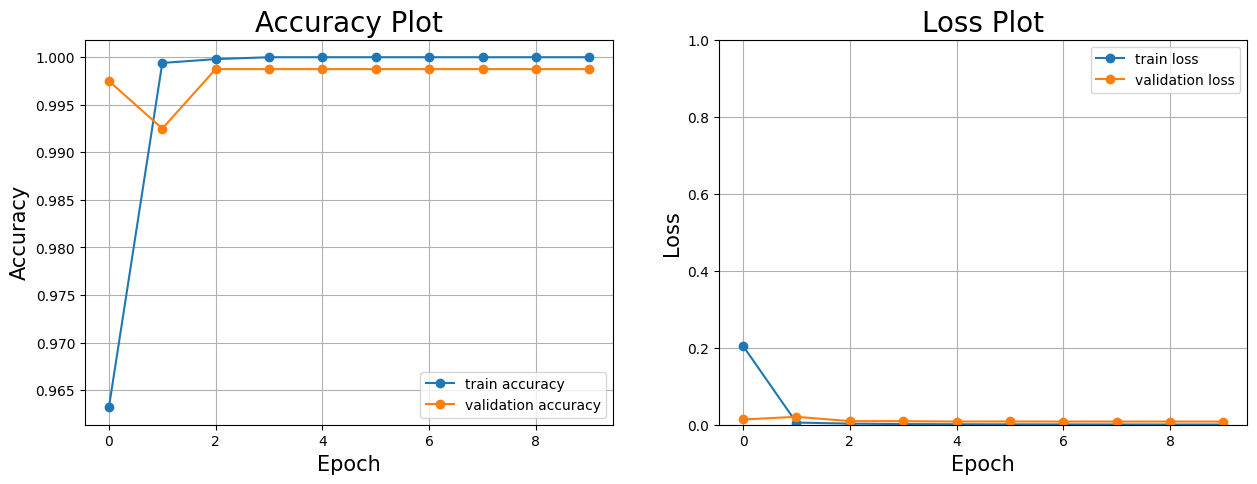

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Accuracy Plot", size=20)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch', size=15)
plt.ylabel('Accuracy', size=15)
plt.grid(True)
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.title("Loss Plot", size=20)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch', size=15)
plt.ylabel('Loss', size=15)
plt.ylim([0, 1])
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

### Make Predictions

In [21]:
predictions = model.predict(X_test)

predict=[]

for i in range(len(predictions)):
    if predictions[i][0]>0.5:
        predict.append(1)
    else:
        predict.append(0)

In [22]:
confMat_df = pd.DataFrame(confusion_matrix(y_test, predict), columns= ["No Mask", "Mask"], index = ["No Mask", "Mask"])
print(f"Confusion Matrix of the Predicted Results:\n\n {confMat_df}")

Confusion Matrix of the Predicted Results:

          No Mask  Mask
No Mask      508     1
Mask           0   483


Save the Model for Testing on WebCam

In [23]:
model_name = "mask_detection_mb.h5"
tf.keras.models.save_model(model, model_name)